In [1]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.


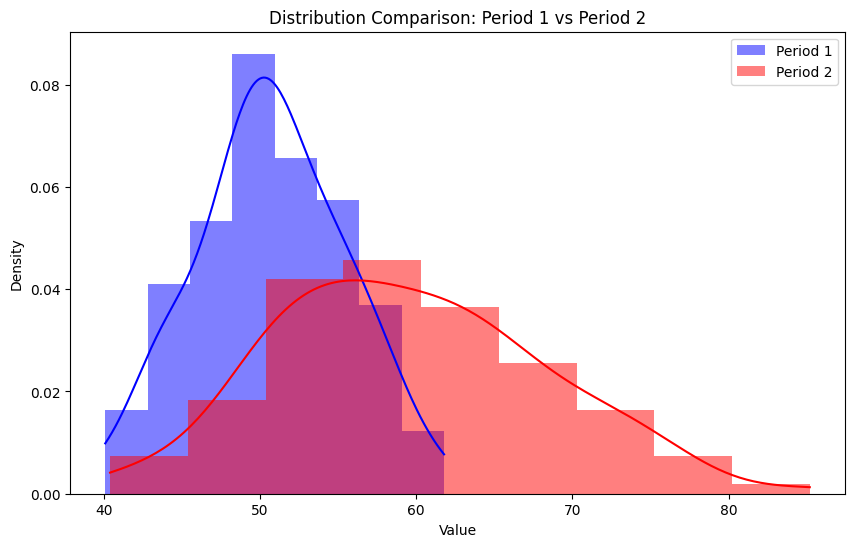

KS Statistic: 0.5080808080808081
KS P-value: 3.514617305851639e-12
Data drift detected: The distributions are significantly different.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
data = {
    'date': pd.date_range(start='2023-01-01', periods=100, freq='D').append(pd.date_range(start='2023-04-01', periods=100, freq='D')),
    'value': np.concatenate([np.random.normal(loc=50, scale=5, size=100), np.random.normal(loc=60, scale=10, size=100)])
}
df = pd.DataFrame(data)
df['period'] = np.where(df['date'] < '2023-04-01', 'Period 1', 'Period 2')
plt.figure(figsize=(10, 6))
sns.histplot(df[df['period'] == 'Period 1']['value'], color='blue', label='Period 1', kde=True, stat='density', linewidth=0)
sns.histplot(df[df['period'] == 'Period 2']['value'], color='red', label='Period 2', kde=True, stat='density', linewidth=0)
plt.legend()
plt.title("Distribution Comparison: Period 1 vs Period 2")
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
period_1_values = df[df['period'] == 'Period 1']['value']
period_2_values = df[df['period'] == 'Period 2']['value']
ks_statistic, ks_p_value = ks_2samp(period_1_values, period_2_values)
print(f"KS Statistic: {ks_statistic}")
print(f"KS P-value: {ks_p_value}")
if ks_p_value < 0.05:
    print("Data drift detected: The distributions are significantly different.")
else:
    print("No significant data drift detected: The distributions are similar.")